## Porównanie Random Forest, KNN i Decision Tree na podstawie danych Heart Disease UCI

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


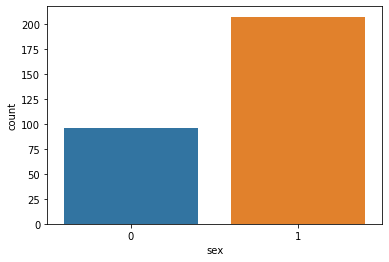

In [4]:
sns.countplot(data=df,x='sex',)

Atrybuty:    

age   
sex  
chest pain type (4 values)  
resting blood pressure  
serum cholestoral in mg/dl  
fasting blood sugar > 120 mg/dl  
resting electrocardiographic results (values 0,1,2)  
maximum heart rate achieved  
exercise induced angina  
oldpeak = ST depression induced by exercise relative to rest  
the slope of the peak exercise ST segment  
number of major vessels (0-3) colored by flourosopy  
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect - maximum heart rate achieved  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### EDA - Exploratory Data Analysis

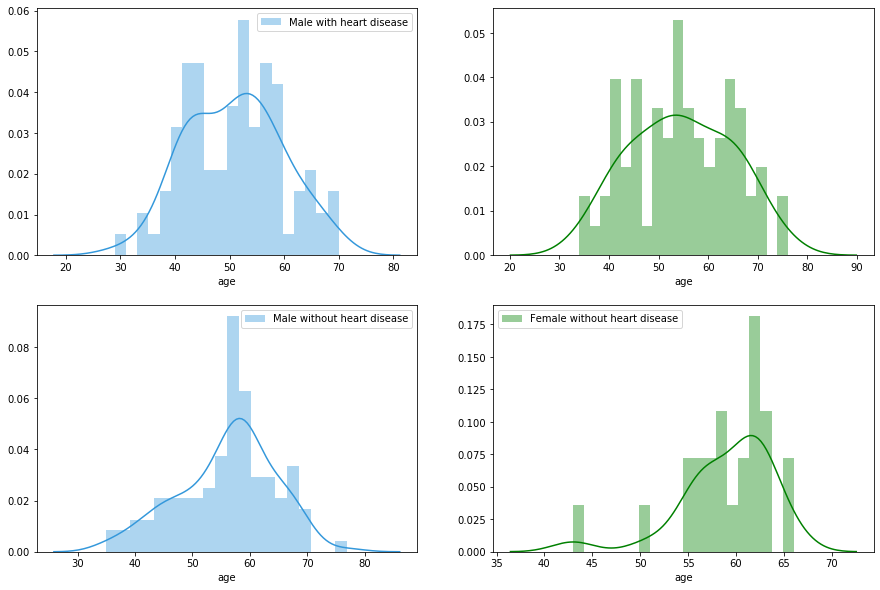

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(df[(df['target']==1) & (df['sex']==1)]['age'],label='Male with heart disease',color='#3498DB',bins=20)
plt.legend()
plt.subplot(2,2,3)
sns.distplot(df[(df['target']==0) & (df['sex']==1)]['age'],label='Male without heart disease',color='#3498DB',bins=20)
plt.legend()
plt.subplot(2,2,2)
sns.distplot(df[(df['target']==1) & (df['sex']==0)]['age'],label='Female with heart disease',color='green',bins=20)
plt.subplot(2,2,4)
sns.distplot(df[(df['target']==0) & (df['sex']==0)]['age'],label='Female without heart disease',color='green',bins=20)
plt.legend()

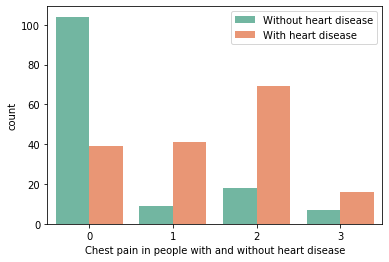

In [8]:
sns.countplot(data=df, x='cp', hue = 'target', palette= 'Set2')
plt.xlabel('Chest pain in people with and without heart disease')
plt.legend( loc='upper right', labels=['Without heart disease', 'With heart disease'])

In [ ]:
# sns.pairplot(df, hue='target', palette='Set1')

Text(0.5, 1, 'People with heart disease correlation heatmap')

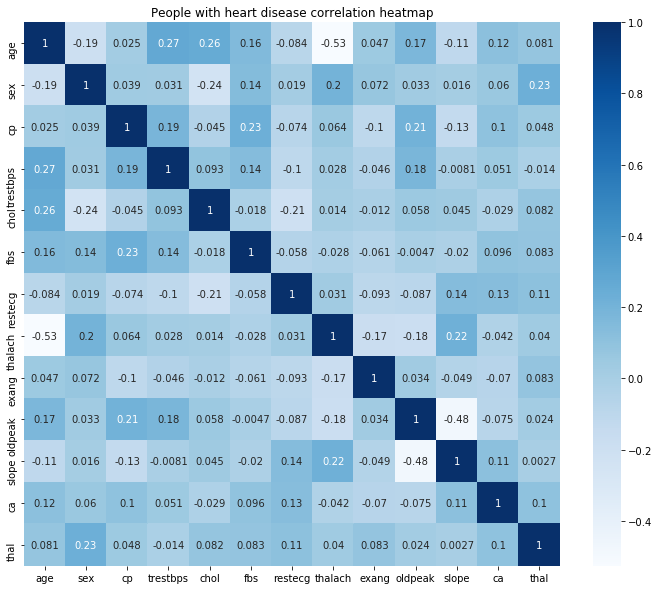

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(df[df['target']==1].drop('target',axis=1).corr(),cmap='Blues',annot=True)
plt.title('People with heart disease correlation heatmap')

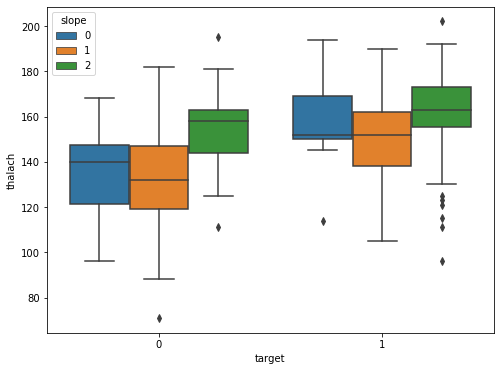

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='target', y='thalach', hue="slope")

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = df.drop('target',axis=1)
y = df['target']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

## Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
dtree = DecisionTreeClassifier()

In [8]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
def evaluate(prediction,y_test): 
    result = classification_report(y_test,prediction,output_dict=True)
    f1 = result['1']['f1-score']
    accuracy = result['accuracy']
    performance_data= {'f1-score':round(f1, 2),
                      'accuracy':round(accuracy, 2)}
    return performance_data

In [18]:
dt_prediction = dtree.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score

In [20]:
print(classification_report(y_test,dt_prediction))

dtree_pr= evaluate(dt_prediction,y_test)
dtree_pr

              precision    recall  f1-score   support

           0       0.69      0.80      0.74        41
           1       0.81      0.70      0.75        50

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.76      0.75      0.75        91



{'f1-score': 0.75, 'accuracy': 0.75}

In [21]:
# from IPython.display import Image  
# from sklearn.externals.six import StringIO  
# from sklearn.tree import export_graphviz
# import pydot 

c:\users\tulodzie\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
# !pip3 install pydot

In [22]:
features = list(df.columns[:-1])
features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

[Text(184.5585, 206.56799999999998, 'X[11] <= 0.5\ngini = 0.496\nsamples = 212\nvalue = [97, 115]'),
 Text(116.34300000000002, 184.824, 'X[12] <= 2.5\ngini = 0.381\nsamples = 129\nvalue = [33, 96]'),
 Text(75.33000000000001, 163.07999999999998, 'X[9] <= 1.7\ngini = 0.18\nsamples = 90\nvalue = [9, 81]'),
 Text(50.220000000000006, 141.336, 'X[3] <= 167.0\ngini = 0.094\nsamples = 81\nvalue = [4, 77]'),
 Text(33.480000000000004, 119.592, 'X[0] <= 60.5\ngini = 0.073\nsamples = 79\nvalue = [3, 76]'),
 Text(20.088, 97.848, 'X[3] <= 109.0\ngini = 0.029\nsamples = 67\nvalue = [1, 66]'),
 Text(13.392000000000001, 76.10399999999998, 'X[1] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(6.696000000000001, 54.360000000000014, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(20.088, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(26.784000000000002, 76.10399999999998, 'gini = 0.0\nsamples = 62\nvalue = [0, 62]'),
 Text(46.87200000000001, 97.848, 'X[9] <= 0.2\ngini = 

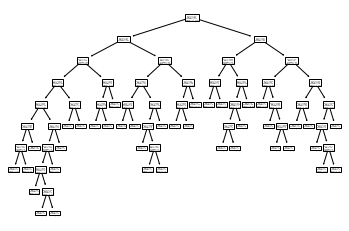

In [23]:
from sklearn import tree
tree.plot_tree(dtree)

## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
rf_prediction = rf.predict(X_test)

In [27]:
print(classification_report(y_test,rf_prediction))
rf_pr = evaluate(rf_prediction,y_test)
print(rf_pr)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

{'f1-score': 0.83, 'accuracy': 0.81}


In [28]:
## Randomized Search 
from sklearn.model_selection import RandomizedSearchCV

In [29]:
param_rand = {'n_estimators': np.arange(100,800,100),
              'max_features' : ['auto', 'sqrt'],
              'min_samples_leaf': [1,2,4],
              'min_samples_split': [2, 5, 10],
              'max_depth' : np.arange(10,100,10),
              'max_leaf_nodes': np.arange(2,5,10),
             }

In [30]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = param_rand, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
# trenowanie modelu dla kazdej kombinacji hyperparametrow - zajmuje baaardzo duuuzo czasu :)
##rf_random.fit(X_train,y_train)

In [31]:
# dla najlepszej kombinacji hyperparametrow budowa ostatecznego modelu
rf_randomized = RandomForestClassifier(n_estimators= 600,min_samples_split= 5, min_samples_leaf = 1,
                                       max_leaf_nodes= 2,max_features= 'auto',max_depth= 70)
rf_randomized.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=70, max_features='auto',
                       max_leaf_nodes=2, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
rf_rand_prediction = rf_randomized.predict(X_test)

In [33]:
print(classification_report(y_test,rf_rand_prediction))
rf_rand_pr = evaluate(rf_rand_prediction,y_test)
rf_rand_pr

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        41
           1       0.82      0.92      0.87        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.84        91



{'f1-score': 0.87, 'accuracy': 0.85}

## Support Vector Machine (SVM)

In [34]:
from sklearn.svm import SVC #SVR

In [35]:
model = SVC()

In [36]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
svm_prediction = model.predict(X_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
print(classification_report(y_test,svm_prediction))
svm_pr = evaluate(svm_prediction,y_test)
svm_pr

              precision    recall  f1-score   support

           0       0.79      0.46      0.58        41
           1       0.67      0.90      0.77        50

    accuracy                           0.70        91
   macro avg       0.73      0.68      0.68        91
weighted avg       0.73      0.70      0.69        91



{'f1-score': 0.77, 'accuracy': 0.7}

In [40]:
## Grid Search
from sklearn.model_selection import GridSearchCV
svm_param_grid= {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001,0.00001],
           'kernel': ['rbf','sigmoid']}

In [41]:
svm_grid = GridSearchCV(SVC(),svm_param_grid,refit=True,verbose=2)
svm_grid.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] 

[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C

[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] ............... C=10, gamma=0.0001, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] ............... C=10, gamma=0.0001, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] ............... C=10, gamma=0.0001, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] .

[CV] ................... C=100, gamma=1e-05, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1e-05, kernel=rbf ..................................
[CV] ................... C=100, gamma=1e-05, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1e-05, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=1e-05, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1e-05, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=1e-05, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1e-05, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=1e-05, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1e-05, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=1e-05, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1e-05, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=1e-05, kernel=sigmoid, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] .

[CV] .................. C=1000, gamma=1e-05, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1e-05, kernel=sigmoid .............................
[CV] .............. C=1000, gamma=1e-05, kernel=sigmoid, total=   0.0s
[CV] C=1000, gamma=1e-05, kernel=sigmoid .............................
[CV] .............. C=1000, gamma=1e-05, kernel=sigmoid, total=   0.0s
[CV] C=1000, gamma=1e-05, kernel=sigmoid .............................
[CV] .............. C=1000, gamma=1e-05, kernel=sigmoid, total=   0.0s
[CV] C=1000, gamma=1e-05, kernel=sigmoid .............................
[CV] .............. C=1000, gamma=1e-05, kernel=sigmoid, total=   0.0s
[CV] C=1000, gamma=1e-05, kernel=sigmoid .............................
[CV] .............. C=1000, gamma=1e-05, kernel=sigmoid, total=   0.0s


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [42]:
svm_grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [43]:
svm_grid_prediction = svm_grid.predict(X_test)

In [44]:
print(classification_report(y_test,svm_grid_prediction))
svm_grid_pr = evaluate(svm_grid_prediction,y_test)
svm_grid_pr

              precision    recall  f1-score   support

           0       0.71      0.78      0.74        41
           1       0.80      0.74      0.77        50

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



{'f1-score': 0.77, 'accuracy': 0.76}

## K Nearest Neighbors (KNN)

In [46]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(df.drop('target',axis=1))
scaled_data = scale.transform(df.drop('target',axis=1))
df_scaled = pd.DataFrame(scaled_data,columns=df.drop('target',axis=1).columns)
df_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [47]:
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(scaled_data,df['target'],
                                                    test_size=0.30)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

In [49]:
knn.fit(X_scaled_train,y_scaled_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [50]:
knn_prediction = knn.predict(X_scaled_test)

In [51]:
print(classification_report(knn_prediction,y_scaled_test))
knn1_pr = evaluate(knn_prediction,y_scaled_test)
knn1_pr

              precision    recall  f1-score   support

           0       0.80      0.59      0.68        56
           1       0.54      0.77      0.64        35

    accuracy                           0.66        91
   macro avg       0.67      0.68      0.66        91
weighted avg       0.70      0.66      0.66        91



{'f1-score': 0.64, 'accuracy': 0.66}

In [52]:
prediction_data={'Model':['Decision Tree',
                          'Random Forest',
                          'Random Forest using Randomized Search',
                          'SVM',
                          'SVM using Grid Search',
                          'KNN'
                         ],
                   'F1-score':[dtree_pr['f1-score'],
                              rf_pr['f1-score'],
                              rf_rand_pr['f1-score'],
                              svm_pr['f1-score'],
                              svm_grid_pr['f1-score'],
                              knn1_pr['f1-score']],
                 
                   'Accuracy':[dtree_pr['accuracy'],
                              rf_pr['accuracy'],
                              rf_rand_pr['accuracy'],
                              svm_pr['accuracy'],
                              svm_grid_pr['accuracy'],
                              knn1_pr['accuracy']]
                    }
 
# Create DataFrame
prediction_table = pd.DataFrame(prediction_data)
prediction_table

,Model,F1-score,Accuracy
0,Decision Tree,0.75,0.75
1,Random Forest,0.83,0.81
2,Random Forest using Randomized Search,0.87,0.85
3,SVM,0.77,0.70
4,SVM using Grid Search,0.77,0.76
5,KNN,0.64,0.66
